# scqubits example: the fluxonium qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
fluxonium = scq.Fluxonium.create()

Output()

In [3]:
print(fluxonium)

Fluxonium-----------|
                    | EJ: 8.9
                    | EC: 2.5
                    | EL: 0.5
                    | flux: 0.0
                    | cutoff: 110
                    | truncated_dim: 10
                    |
                    | dim: 110



**Programmatic creation**

In [4]:
fluxonium2 = scq.Fluxonium(
    EJ=8.9,
    EC=2.5,
    EL=0.5,
    cutoff = 110,
    flux = 0.5
)

## Computing and visualizing spectra

In [5]:
fluxonium.eigenvals()

array([-4.28338463,  4.47506063,  4.69616798,  6.71864972, 12.64960539,
       15.28847499])

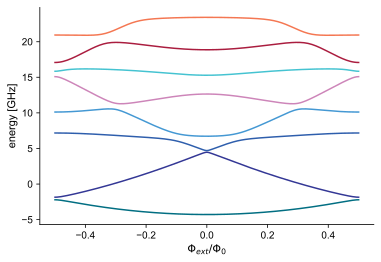

In [6]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

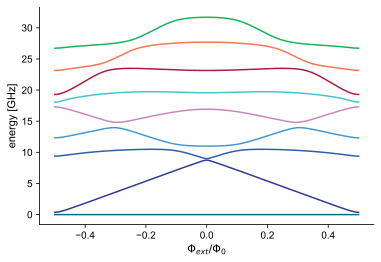

In [7]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=9, subtract_ground=True);

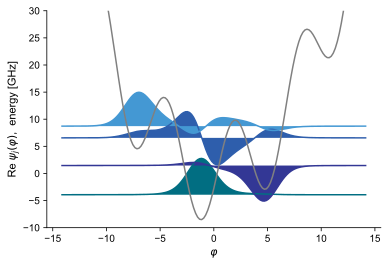

In [8]:
fluxonium.flux = 0.2
fluxonium.plot_wavefunction(esys=None, which=range(4), mode='real', ylim=[-10,30], scaling=1);

## Matrix elements

In [9]:
phimat = fluxonium.matrixelement_table('phi_operator', evals_count=10)
print(phimat)

[[-1.14135428e+00 -2.58395206e-01 -9.15436443e-01  1.35714867e-01
   1.73698327e-01 -3.67488410e-02 -6.05070768e-02 -1.59843175e-02
  -1.89217083e-02 -1.98747483e-02]
 [-2.58395206e-01  4.50653240e+00 -7.39540617e-01  2.23730971e-01
  -7.35851764e-01  3.01676593e-01 -1.23897846e-01  4.47489129e-03
  -3.89919069e-02 -2.60409964e-02]
 [-9.15436443e-01 -7.39540617e-01 -9.40229103e-01 -1.64354647e+00
   1.52593930e+00  4.75120208e-01 -1.74855744e-01  2.41918716e-01
   8.65918258e-02 -5.26025500e-02]
 [ 1.35714867e-01  2.23730971e-01 -1.64354647e+00 -6.16721965e+00
  -1.68993568e+00 -7.54384049e-01 -5.10775769e-01  1.77848121e-01
   1.02419209e-01  1.38631504e-01]
 [ 1.73698327e-01 -7.35851764e-01  1.52593930e+00 -1.68993568e+00
   2.14389937e+00 -2.86024240e+00  4.04668503e-01  2.52227518e-01
   7.45290559e-02 -1.14292480e-01]
 [-3.67488410e-02  3.01676593e-01  4.75120208e-01 -7.54384049e-01
  -2.86024240e+00 -9.93321912e-01 -3.63355314e+00 -4.23550557e-01
  -1.38979031e-01  1.75663585e-01

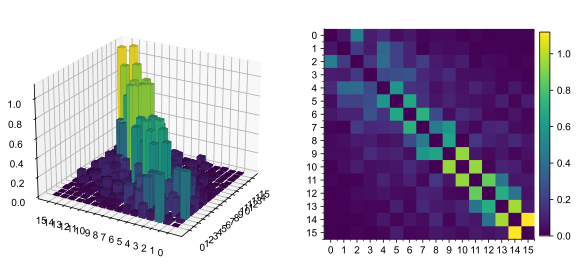

In [10]:
fluxonium.plot_matrixelements('n_operator', evals_count=16);

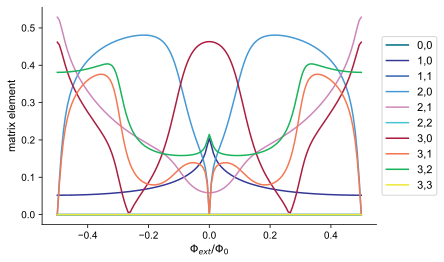

In [11]:
fluxonium.plot_matelem_vs_paramvals('n_operator', 'flux', flux_list, select_elems=4);